In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

In [8]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [18]:
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

In [19]:
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [20]:
yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

In [21]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


Text(0, 0.5, 'Proportion deaths')

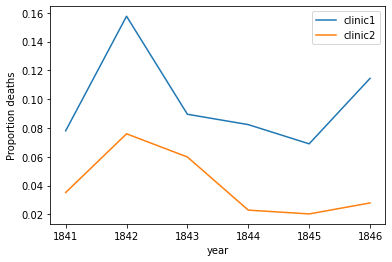

In [22]:
ax = yearly1.plot(x='year', y='proportion_deaths', label='clinic1')
yearly2.plot(x='year', y='proportion_deaths', label='clinic2', ax=ax)
ax.set_ylabel('Proportion deaths')

In [24]:
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

In [26]:
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

In [27]:
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


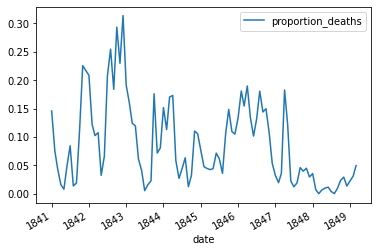

In [28]:
ax = monthly.plot(x = 'date', y='proportion_deaths')
ax.set_ylabel = 'proportion_deaths'

In [30]:
monthly.head(5)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [41]:
before_handwashing = monthly[monthly['date'] < '1847-01-01']
after_handwashing = monthly[monthly['date'] >= '1847-01-01']

Text(0, 0.5, 'Propotion deaths')

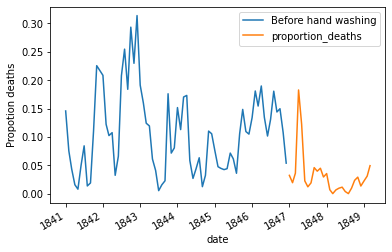

In [43]:
ax = before_handwashing.plot(x = 'date', y='proportion_deaths', label = 'Before hand washing')
after_handwashing.plot(x = 'date', y='proportion_deaths', ax = ax)
ax.set_ylabel('Propotion deaths')

In [45]:
before_proportion = before_handwashing.proportion_deaths
after_proportion = after_handwashing.proportion_deaths

In [48]:
mean_diff = np.mean(after_proportion) - np.mean(before_proportion)

In [49]:
mean_diff

-0.07519076642777142

In [50]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( np.mean(boot_after) - np.mean(boot_before) )

confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.095962
0.975   -0.051608
dtype: float64

In [51]:
doctor_should_wash_their_hands = True